# Python "from zero to hero"

July 6th, 2022

The content of the following notebook is almost entirely based on the course [https://it.softpython.org/](https://it.softpython.org/), which are made available under the license CC-BY 4.0. The above-mentioned website was realized with funds provided by the departments of Information Science and Engineering, Mathematics, and Sociology of the University of Trento, and it was written by David Leoni, Marco Caresia, Alessio Zamboni, Luca Bosotti, and Massimiliano Luca.

## Part III.1 - Data acquisition, manipulation and visualization

### Plain text files

A common way to store data into plain text files is to write them on separate lines.
An example is the following:

    Leonardo
    da Vinci
    Sandro
    Botticelli
    Niccolò
    Macchiavelli

We may want to read the information above from an external file, then to print the name and surname of a person on the same line instead of on separate lines.

Copy and paste the text above in a text file in the same folder of the Jupyter notebook and call it `example1.txt`.

In [1]:
with open('example1.txt', encoding='utf-8') as f:
    line = f.readline()
    print(line)

Leonardo



The command

    open('example1.txt', encoding='utf-8')

allowed opening the file by specifying the path where the file is located. The parameter `encoding='utf-8'` provided the information about the encoding of the file (see yesterday's lecture).

#### The encoding

The encoding standard of a file may depend on the operative system and on the editor that were used to write a file.
When we open a file, Python cannot guess the encoding and if we do not specify it, we could end seeing several weird symbols instead of, for instance, letters with accent.

If the encoding of the file is not known, a good guess is `utf-8`, which is a very common encoding.
Alternatively, we can try with `latin-1`, which is very common instead if the file was created in a Windows environment.
In case you need to open a file that has been written in China, you may need to use a completely different encoding.
A useful reference (in Italian) about encodings is the [following](https://gpiancastelli.altervista.org/dip3-it/stringhe.html).

#### The `with` statement

`with` defines a block containing some instructions

    with open('example1.txt', encoding='utf-8') as f:
        line = f.readline()
        print(line)

The `with` statement is used to operate within a context, for further reference you can read the following [page](https://docs.python.org/3/reference/datamodel.html#with-statement-context-managers).
If you are new to Python, do not get stuck in understanding how context management works, simply remember that in our scripts it will automatically close the file after we used it.
That is, even though there are errors during the execution of the script (i.e., the commands `line = f.readline()` and `print(line)`), Python will close the file.
If we open the file without using `with`, we must remember to explicitly close it, otherwise we might end with several 'zombie' files that are left open and occupy memory.
Finally, in the final part of the `with` line we assigned the file (remember, also the file is treated as an object) to a variable `f` using the statement `as f`. We could have used any other name than `f`, but we must assign it to a variable to access it afterwards.

The command

    line = f.readline()

stores the content of the first line in the variable `line` as string, which (pay attention!) will contain also the special character `\n` for the newline.
The command `readline` is a method of the file object that we opened in the previous line.
Let's see things a bit more clearly:

In [1]:
with open('example1.txt', encoding='utf-8') as f:
    line = f.readline()
    print(line)
    print(type(f))
    help(f.readline)      # Attenzione: ricordati il 'f.' prima del readline !!
    help(f)

Leonardo

<class '_io.TextIOWrapper'>
Help on built-in function readline:

readline(size=-1, /) method of _io.TextIOWrapper instance
    Read until newline or EOF.
    
    Returns an empty string if EOF is hit immediately.

Help on TextIOWrapper object:

class TextIOWrapper(_TextIOBase)
 |  TextIOWrapper(buffer, encoding=None, errors=None, newline=None, line_buffering=False, write_through=False)
 |  
 |  Character and line based layer over a BufferedIOBase object, buffer.
 |  
 |  encoding gives the name of the encoding that the stream will be
 |  decoded or encoded with. It defaults to locale.getpreferredencoding(False).
 |  
 |  errors determines the strictness of encoding and decoding (see
 |  help(codecs.Codec) or the documentation for codecs.register) and
 |  defaults to "strict".
 |  
 |  newline controls how line endings are handled. It can be None, '',
 |  '\n', '\r', and '\r\n'.  It works as follows:
 |  
 |  * On input, if newline is None, universal newlines mode is
 |    en

In [3]:
with open('example1.txt', encoding='utf-8') as f:
    nome = f.readline()
    cognome = f.readline()
    print(nome + ' ' + cognome)

Leonardo
 da Vinci



The result is not what we expected! The surname was printed on a new line. That's because at the end of each line there is a newline character.
To delete the newline character we can use the string method `rstrip()`.

In [4]:
with open('example1.txt', encoding='utf-8') as f:
    nome = f.readline().rstrip()
    cognome = f.readline().rstrip()
    print(nome + ' ' + cognome)

Leonardo da Vinci


In [5]:
# what if we use strip instead of rstrip
with open('example1.txt', encoding='utf-8') as f:
    nome = f.readline().strip()
    cognome = f.readline().strip()
    print(nome + ' ' + cognome)

Leonardo da Vinci


In [6]:
help(str.strip)

Help on method_descriptor:

strip(self, chars=None, /)
    Return a copy of the string with leading and trailing whitespace removed.
    
    If chars is given and not None, remove characters in chars instead.



In [7]:
# ... and what about lstrip

with open('example1.txt', encoding='utf-8') as f:
    nome=f.readline().lstrip()
    cognome=f.readline().lstrip()
    print(nome + ' ' + cognome)

Leonardo
 da Vinci



In [4]:
with open('example1.txt', encoding='utf-8') as f:
    line = f.readline()
    while line != "":
        name = line.rstrip()
        surname = f.readline().rstrip()
        print(name + ' ' + surname)
        line = f.readline()

# Comments: pointer to new line

Leonardo da Vinci
Sandro Botticelli
Niccolò Macchiavelli


### Parsing a more complex file

Assume we have a file whose content is the following:

    nome: Leonardo
    cognome: da Vinci
    data di nascita: 1452-04-15
    nome: Sandro
    cognome: Botticelli
    data di nascita: 1445-03-01
    nome: Niccolò
    cognome: Macchiavelli
    data di nascita: 1469-05-03

We want to parse the file and print the following result:

    Leonardo da Vinci, 1452-04-15
    Sandro Botticelli, 1445-03-01
    Niccolò Macchiavelli, 1469-05-03


In [9]:
# save the content to parse in a file called example2.txt
with open('example2.txt', encoding='utf-8') as f:
    line = f.readline()
    while line != "":
        name = line.rstrip()[6:]
        surname = f.readline().rstrip()[len("cognome: "):]
        born = f.readline().rstrip()[len("data di nascita: "):]
        print(name + ' ' + surname + ', ' + born)
        line = f.readline()


Leonardo da Vinci, 1452-04-15
Sandro Botticelli, 1445-03-01
Niccolò Macchiavelli, 1469-05-03


### CSV files

There are several formats for tabular data, one of the most common is Excel, which saves files using the `.xls` or `.xlsx` format.
Unfortunately, if we want to process data automatically, it would be better to avoid Excel and to prefer CSV files, which are *comma separated values* files.
CSV files should be preferred to Excel files because they allow data to be read and reused with (almost) any software, i.e., they provide better compatibility.
However, CSV files are not the solution to all the problems, there are also drawbacks of which to be aware of.

There are very popular Python libraries that can be used to read CSV files, like for instance Pandas.
However, we will start by reading CSV files line by line.
This method present the advantage that the whole file is not loaded in the memory.
A large dataset could contain gigabytes of data, hence it could saturate the memory of our laptop.
Reading large dataset line by line allow us to overcome the problem.

Save the following lines in a new file and save it with name `example_1` and the extension `.csv`.

    animal, years
    dog, 12
    cat, 14
    pelican, 30
    squirrel, 6
    eagle, 25

The native Python library `csv` offers support to read CSV files line by line.

In [7]:
import csv
with open('example_1.csv', encoding='utf-8', newline='') as f:

    # create a 'reader' object that will read the lines from the file
    reader = csv.reader(f, delimiter=',')

    # 'reader' is an 'iterable' object, which produces a sequence of lines from the csv
    # NOTE: here, each row of the file is converted into a list of strings
    for row in reader:
        print('We have just read a line!')
        print(row)
        print('')

We have just read a line!
['animal', ' years']

We have just read a line!
['dog', ' 12']

We have just read a line!
['cat', ' 14']

We have just read a line!
['pelican', ' 30']

We have just read a line!
['squirrel', ' 6']

We have just read a line!
['eagle', ' 25']



In [11]:
with open('example_1.csv', encoding='utf-8', newline='') as f:
    reader = csv.reader(f, delimiter=',')
    for row in reader: # an iterable object can be used directly here
                       # Notice that we do not need to stop the reader when the file ends, it stops automatically
        print(row)

['animal', ' years']
['dog', ' 12']
['cat', ' 14']
['pelican', ' 30']
['squirrel', ' 6']
['eagle', ' 25']


Wonderful, the `reader` object already parsed the columns.
Each element of the lists corresponds to a value in a column.
Notice also that the numbers are printed as strings of text, they need to be converted before being used.

**REMEMBER**: iterable objects cannot be used a second time once they have been 'consumed', i.e., after they have been read until the last line.
To start reading a file from the beginning, we need to initialize the reader object a second time.
That is, we need a 'brand new' iterable.

In [8]:
with open('example_2.csv', encoding='utf-8', newline='') as f:
    reader = csv.reader(f, delimiter=',')
    list_one = []
    for row in reader:
        list_one.append(row)

print(list_one)

[['animal', ' years', ' description'], ['dog', ' 12', ' dogs bark'], ['cat', ' 14', ' cats meow'], ['pelican', ' 30', ' pelicans fly'], ['squirrel', ' 6', ' squirrels squeak'], ['eagle', ' 25', ' eagles fly']]


Now, what if we want to save a description containing a comma?

#### Read CSV as dictionaries

Thanks to the `csv.dictReader` object, we can read CSV files as dictionaries, which keys are the names of the columns.

In [13]:
import csv
with open('example_2.csv', 'r', encoding='utf-8', newline='') as f:  # notice that we added the option 'r'
    reader = csv.DictReader(f, delimiter=',')   # Notice we now used DictReader
    for diz in reader:
        print(diz)

{'animal': 'dog', ' years': ' 12', ' description': ' dogs bark'}
{'animal': 'cat', ' years': ' 14', ' description': ' cats meow'}
{'animal': 'pelican', ' years': ' 30', ' description': ' pelicans fly'}
{'animal': 'squirrel', ' years': ' 6', ' description': ' squirrels squeak'}
{'animal': 'eagle', ' years': ' 25', ' description': ' eagles fly'}


### Write a CSV file

Pay attention that when you are writing CSV files, there is no control for overwriting of old files, so old files can be overwritten without notice.


In [14]:
import csv

# To write a file, remember to specify the option 'w' when you open itPer scrivere, RICORDATI di specificare l'opzione 'w'
# ATTENTION: 'w' replaces *completely* any existing file!
with open('written-file.csv', 'w') as csv_to_write:

    writer = csv.writer(csv_to_write, delimiter=',')

    writer.writerow(['This', 'is', 'a header'])
    writer.writerow(['some', 'example', 'data'])
    writer.writerow(['some', 'other', 'example data'])

### Reading and writing a CSV file

To write in a new CSV file taking data from another one, it is possible to operate within the same `with` block.

**ATTENTION** This procedure is as handy as dangerous: it is very easy to overwrite files and lose data **forever**.

Some hints to avoid data loss issues:
- use explicit names both for files and data handlers
- keep a backup copy of the data you are working with
- read the code carefully before you run it!


In [15]:
import csv
# the option 'w' overwrite the output file completely
# we open the file to write before
with open('example_1_plus.csv', 'w', encoding='utf-8', newline='') as csv_to_write:
    writer = csv.writer(csv_to_write, delimiter=',')

    # ... and the file to read after
    # this 'with' is within another 'with'
    # ATTENTION: the internal handle is called 'csv_to_read'
    with open('example_1.csv', encoding='utf-8', newline='') as csv_to_read:
        reader = csv.reader(csv_to_read, delimiter=',')

        for row in reader:
            row.append('something else')
            writer.writerow(row)
            writer.writerow(row)
            writer.writerow(row)

In [16]:
with open('example_1_plus.csv', encoding='utf-8', newline='') as f:
    reader = csv.reader(f, delimiter=',')
    list_one = [i for i in reader]

print(list_one)

[['animal', ' years', 'something else'], ['animal', ' years', 'something else'], ['animal', ' years', 'something else'], ['dog', ' 12', 'something else'], ['dog', ' 12', 'something else'], ['dog', ' 12', 'something else'], ['cat', ' 14', 'something else'], ['cat', ' 14', 'something else'], ['cat', ' 14', 'something else'], ['pelican', ' 30', 'something else'], ['pelican', ' 30', 'something else'], ['pelican', ' 30', 'something else'], ['squirrel', ' 6', 'something else'], ['squirrel', ' 6', 'something else'], ['squirrel', ' 6', 'something else'], ['eagle', ' 25', 'something else'], ['eagle', ' 25', 'something else'], ['eagle', ' 25', 'something else']]


### The JSON format

The JSON format is more complex, it allows to represent nested data structures, and it is popular in web applications.

A file with the extension `.json` is simply a text file showing a tree structure.
Let's see an example taken from the dataset [`bike-sharing-lavis.json`](https://it.softpython.org/formats/bike-sharing-lavis.json)

    [
    {
        "name": "Grazioli",
        "address": "Piazza Grazioli - Lavis",
        "id": "Grazioli - Lavis",
        "bikes": 3,
        "slots": 7,
        "totalSlots": 10,
        "position": [
        46.139732902099794,
        11.111516155225331
        ]
    },
    {
        "name": "Pressano",
        "address": "Piazza della Croce - Pressano",
        "id": "Pressano - Lavis",
        "bikes": 2,
        "slots": 5,
        "totalSlots": 7,
        "position": [
        46.15368174037716,
        11.106601229430453
        ]
    },
    {
        "name": "Stazione RFI",
        "address": "Via Stazione - Lavis",
        "id": "Stazione RFI - Lavis",
        "bikes": 4,
        "slots": 6,
        "totalSlots": 10,
        "position": [
        46.148180371138814,
        11.096753997622727
        ]
    }
    ]

As you may notice the JSON style is very similar to we have seen so far in Python.
One difference is the `null` field in JSON, which becomes a `None` type in Python.
The conversion of data in Python is often easy and it does not present drawbacks.
We can read a JSON file using the library `json`, which is a built-in Python module, and it allows the conversion from test to Python structures.

In [2]:
import json

with open('bike-sharing-lavis.json',  encoding='utf-8') as f:
    content = json.load(f)

print(content)

[{'name': 'Grazioli', 'address': 'Piazza Grazioli - Lavis', 'id': 'Grazioli - Lavis', 'bikes': 3, 'slots': 7, 'totalSlots': 10, 'position': [46.139732902099794, 11.111516155225331]}, {'name': 'Pressano', 'address': 'Piazza della Croce - Pressano', 'id': 'Pressano - Lavis', 'bikes': 2, 'slots': 5, 'totalSlots': 7, 'position': [46.15368174037716, 11.106601229430453]}, {'name': 'Stazione RFI', 'address': 'Via Stazione - Lavis', 'id': 'Stazione RFI - Lavis', 'bikes': 4, 'slots': 6, 'totalSlots': 10, 'position': [46.148180371138814, 11.096753997622727]}]


Notice that what we have read using the function `json.load` is no longer text, but there are Python objects instead!

In [3]:
type(content)

list

In [4]:
content[0]

{'name': 'Grazioli',
 'address': 'Piazza Grazioli - Lavis',
 'id': 'Grazioli - Lavis',
 'bikes': 3,
 'slots': 7,
 'totalSlots': 10,
 'position': [46.139732902099794, 11.111516155225331]}

In [6]:
content[0]['address']

'Piazza Grazioli - Lavis'

In [13]:
content[0]['position']

[46.139732902099794, 11.111516155225331]

In [14]:
type(content[0]['position'])

list

Notice that the 'position' is in turn a list.
An interesting characteristic of JSON files is that we have arbitrary hierarchies of objects, without the need to respect a general data structure.

#### JSONL

Sometimes, it is possible to find JSON file organized by lines, where each line corresponds to a JSON document.
To read such files, we open the text file, we read it line by line, and we interpret each line as a JSON document.

In [23]:
import json

with open('employees.jsonl', encoding='utf-8',) as f:
    list_of_json = list(f) # convert the lines of text into a list of strings

i = 0
for text_json in list_of_json:
    content = json.loads(text_json)  # convert json text into a Python object
    print('Object ', i)
    print(content)
    i = i + 1

Object  0
{'nome': 'Mario', 'cognome': 'Rossi'}
Object  1
{'nome': 'Paolo', 'cognome': 'Bianchi'}
Object  2
{'nome': 'Luca', 'cognome': 'Verdi'}


### Visualization of data

In this part of the seminar, we will briefly see how to produce plots using Matplotlib.
Matplotlib is a very popular library to draw plots in Python.
You can install Matplotlib by running the following code in a Windows shell

    pip install matplotlib

Then, you can run our first example.

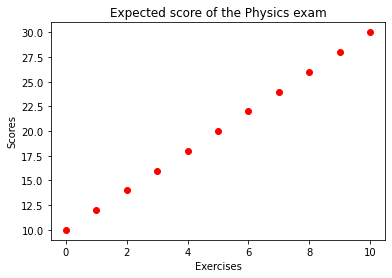

In [8]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 11, 1.)
y = 2*x + 10

plt.plot(x, y, 'ro')
plt.title('Expected score of the Physics exam')
plt.xlabel('Exercises')
plt.ylabel('Scores')

plt.show()

The first row

    %matplotlib inline

is used to integrate Python and Matplotlib, and it defines how we want to visualize plots.

To plot something, the first step is to have something to plot.
Therefore, we prepare data first.
The equation that describes the relationship between the number of exercises and the final mark is `y = 2 x + 10`.
In Python, we can write the following code

    x = np.arange(0, 11, 1.)
    y = 2*x + 10

To show the line in the plot, it is necessary to store the data in two Numpy arrays.
To sample a number of values, we used the Numpy function `arange`; the latter is similar to `range`, but it returns a `ndarray` that can be used directly in calculations.

To plot an array of points, we use the function `plt.plot()`:

    plt.plot(x, y, 'bo')

The third parameter `'bo'` describe the stile of the objects to plot: that is, we want the points to be blue and to present a circular shape.

Remember that the last instruction `plt.show()` is required to show the output.

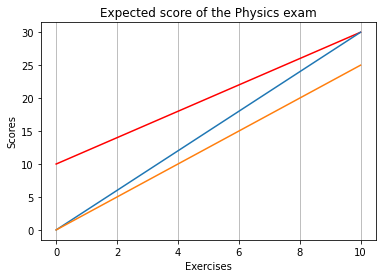

In [27]:
x = np.arange(0, 11, 1.)
y = 2*x + 10
y2 = 3*x
y3 = 2.5*x

plt.plot(x, y, 'r-', x, y2, x, y3)
plt.title('Expected score of the Physics exam')
plt.xlabel('Exercises')
plt.ylabel('Scores')
plt.grid(axis='x')

plt.show()

In [25]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

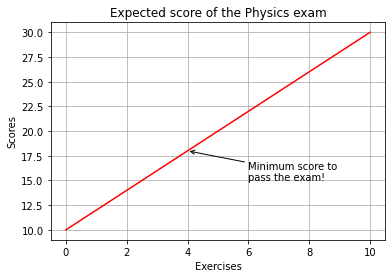

In [12]:
x = np.arange(0, 11, 1.)
y = 2*x + 10

plt.plot(x, y, 'r-')
plt.title('Expected score of the Physics exam')
plt.xlabel('Exercises')
plt.ylabel('Scores')
plt.grid()
# we can also add annotations on the plot
plt.annotate(
    "Minimum score to \npass the exam!",
    xy=(4, 18), arrowprops={'arrowstyle':'->'}, xytext=(6, 15))
plt.show()

#### Change the labels on the x and y axis

The labels on the x and y axis can be changed using the command `plt.xticks` and `plt.yticks`.

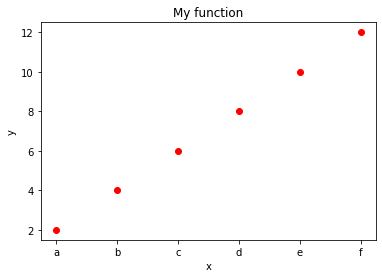

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

xs = [1, 2, 3, 4, 5, 6]
ys = [2, 4, 6, 8,10,12]

plt.plot(xs, ys, 'ro')

plt.title("My function")
plt.xlabel('x')
plt.ylabel('y')

# First we need a sequence with the position of the label along one axis
# then, we need a sequence of the same length with the labels
plt.xticks(xs, ['a', 'b', 'c', 'd', 'e', 'f'])
plt.show()

#### Matlab style vs. object oriented

The style of the code seen so far is similar to that of Matlab.
However, one alternative is possible, which uses a paradigm more proper to Python.
This is the object oriented representation of a plot.

A plot is made of four main objects:
1. `Figure` is the complete figure, made of one or several plots; it is the only item that can be plotted.
2. `Axes` are the plots within a figure, and they contains the representation of the plots in which we are interested
3. `Axis` are the axis of a Cartesian plot
4. `Artist` is everything that is drawn in the figure

<img src="https://it.softpython.org/_images/anatomy.png"/>

The following is the object oriented representation of the plot drawn above.

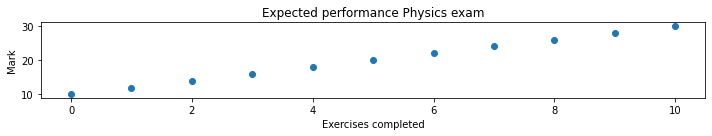

In [14]:
x = np.arange(0, 11, 1.)
y = 2*x + 10

fig = plt.figure(figsize=(10,2))  # 10 inches large, 2 inches tall
ax = fig.add_subplot(111)
ax.plot(x, y, 'o')
ax.set_title('Expected performance Physics exam')
ax.set_xlabel('Exercises completed')
ax.set_ylabel('Mark')
plt.tight_layout()
plt.show()

The first row

    fig = plt.figure()

recall a `Figure` object from the pyplot module.

    ax = fig.add_subplot(111)

generates the `Axes`, that is the plot.
The method requires a single parameter with three figures (i.e., a number), which meaning is:

- the first figure represent the number of rows in the figure
- the second figure represent the number of columns in the figure
- the third row identifies the cell in the grid that is generated by the columns and rows

The method returns an `Axes` object within the `Figure`, which characterize the n-th cell.
Cells are numbered from left to right and from the top to the bottom of a figure.

    ax.plot()

draws the plot in the selected `Axes`.
The remaining commands are the same than before, but this time they are called on the object `ax`.

Let's see how to produce multiple `Axes` in the same `Figure`.

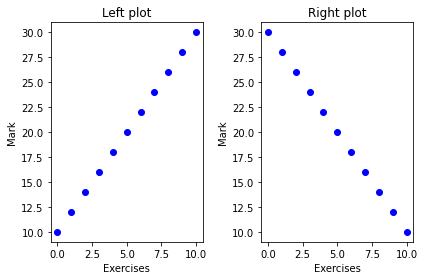

In [16]:
x = np.arange(0, 11, 1.)
y = 2*x + 10

fig = plt.figure()
ax1 = fig.add_subplot(121)  # a grid with 1 row and 2 columns
ax1.plot(x, y, 'bo')
ax1.set_title('Left plot')
ax1.set_xlabel('Exercises')
ax1.set_ylabel('Mark')

ax2 = fig.add_subplot(122)
ax2.plot(x, -y + 40, 'bo')
ax2.set_title('Right plot')
ax2.set_xlabel('Exercises')
ax2.set_ylabel('Mark')

plt.tight_layout()
plt.show()

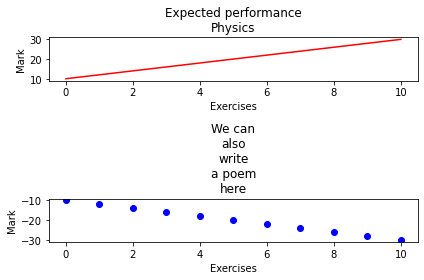

In [19]:
x = np.arange(0, 11, 1.)
y = 2*x + 10

fig = plt.figure()
ax = fig.add_subplot(211)  # a grid with 1 row and 2 columns
ax.plot(x, y, 'r-')
ax.set_title('Expected performance\nPhysics')
ax.set_xlabel('Exercises')
ax.set_ylabel('Mark')

ax = fig.add_subplot(212)
ax.plot(x, -y, 'bo')
ax.set_title('We can\nalso\nwrite\na poem\nhere')
ax.set_xlabel('Exercises')
ax.set_ylabel('Mark')

plt.tight_layout()
plt.show()

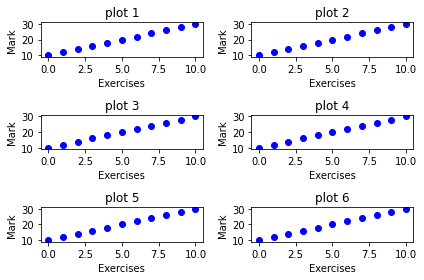

In [31]:
x = np.arange(0, 11, 1.)
y = 2*x + 10


fig = plt.figure()
ax = fig.add_subplot(321)
ax.plot(x, y, 'bo')
ax.set_title('plot 1')
ax.set_xlabel('Exercises')
ax.set_ylabel('Mark')

ax = fig.add_subplot(322)
ax.plot(x, y, 'bo')
ax.set_title('plot 2')
ax.set_xlabel('Exercises')
ax.set_ylabel('Mark')

ax = fig.add_subplot(323)
ax.plot(x, y, 'bo')
ax.set_title('plot 3')
ax.set_xlabel('Exercises')
ax.set_ylabel('Mark')

ax = fig.add_subplot(324)
ax.plot(x, y, 'bo')
ax.set_title('plot 4')
ax.set_xlabel('Exercises')
ax.set_ylabel('Mark')

ax = fig.add_subplot(325)
ax.plot(x, y, 'bo')
ax.set_title('plot 5')
ax.set_xlabel('Exercises')
ax.set_ylabel('Mark')

ax = fig.add_subplot(326)
ax.plot(x, y, 'bo')
ax.set_title('plot 6')
ax.set_xlabel('Exercises')
ax.set_ylabel('Mark')

plt.tight_layout()
plt.show()

#### Histograms


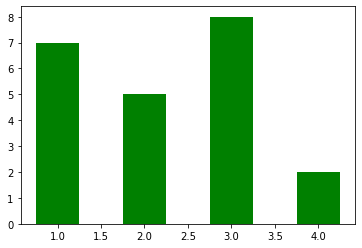

In [32]:
import numpy as np
import matplotlib.pyplot as plt

xs = [1,2,3,4]
ys = [7,5,8,2]

plt.bar(xs, ys,
        0.5,             # width of bars
        color='green',
        align='center')  # align the bars with the xticks

plt.show()

#### A random signal, white noise

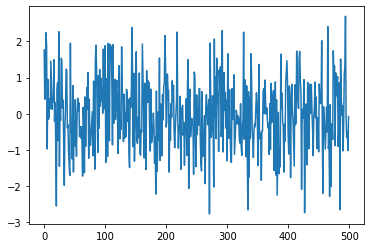

In [33]:
mu = 0  # average
sigma = 1  # standard deviation
num_bins = 50    # number of columns in the histogram

# set the seed for the random number generator, so that the experiment can be repeated
np.random.seed(0)
signal = np.random.normal(mu, sigma, 500) # generate 500 values from a Gaussian distribution and store them in the ndarray 'x'

fig, ax = plt.subplots()  # subplots returns a tuple with figure and axes
ax.plot(signal)
plt.show()

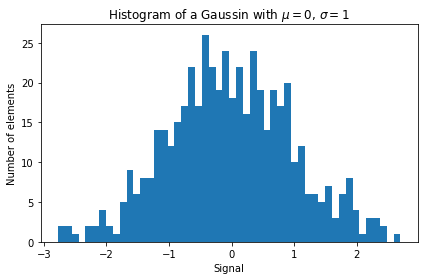

In [34]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()  # Figure and Axes with a single command


mu = 0  # media
sigma = 1  # sqm

np.random.seed(0)

signal = np.random.normal(mu, sigma, 500)

num_bins = 50
# in this case, hist returns three values that we will save in as many variables
n, bins, columns = ax.hist(signal, num_bins)

ax.set_xlabel('Signal')
ax.set_ylabel('Number of elements')
ax.set_title('Histogram of a Gaussin with $\mu=0$, $\sigma=1$')
fig.tight_layout()
plt.show()

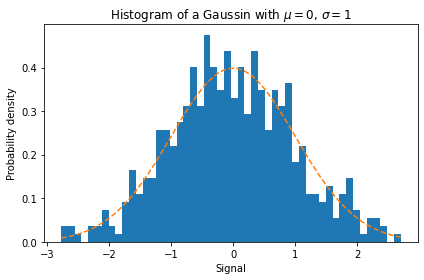

In [35]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()  # Figure and Axes with a single command


mu = 0  # media
sigma = 1  # sqm

np.random.seed(0)

signal = np.random.normal(mu, sigma, 500)

num_bins = 50
# in this case, hist returns three values that we will save in as many variables
n, bins, columns = ax.hist(signal, num_bins, density=True)

y = norm.pdf(bins, mu, sigma)
ax.plot(bins, y, '--')

ax.set_xlabel('Signal')
ax.set_ylabel('Probability density')
ax.set_title('Histogram of a Gaussin with $\mu=0$, $\sigma=1$')
fig.tight_layout()
plt.show()

## Part III.2 - Data analysis with Pandas

On of the main tools for data analysis in Python is the library [Pandas](https://pandas.pydata.org/).
Pandas provides fast and flexible data structures for data analysis, also in real time (i.e., directly in the Python interpreter).
Pandas is based on other libraries, among which there is also Numpy.

<img src="https://it.softpython.org/_images/pydata.png"/>

First of all, check that Pandas is already installed using the command:

    pip install pandas

### Analysis of the Astro Pi data

At the following [address](https://projects.raspberrypi.org/en/projects/astro-pi-flight-data-analysis/5), you can find the sensor data gathered by Raspberry Pi on the orbital space station.

We are going to use the file `Columbus_Ed_astro_pi_datalog.csv` in our analysis.
Remember that the file must be in the same folder of this Jupyter notebook.
Pandas can read CSV files using the method `read_csv`.

In [28]:
import pandas as pd
import numpy as np

df = pd.read_csv('Columbus_Ed_astro_pi_datalog.csv', encoding='utf-8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110869 entries, 0 to 110868
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ROW_ID      110869 non-null  int64  
 1   temp_cpu    110869 non-null  float64
 2   temp_h      110869 non-null  float64
 3   temp_p      110869 non-null  float64
 4   humidity    110869 non-null  float64
 5   pressure    110869 non-null  float64
 6   pitch       110869 non-null  float64
 7   roll        110869 non-null  float64
 8   yaw         110869 non-null  float64
 9   mag_x       110869 non-null  float64
 10  mag_y       110869 non-null  float64
 11  mag_z       110869 non-null  float64
 12  accel_x     110869 non-null  float64
 13  accel_y     110869 non-null  float64
 14  accel_z     110869 non-null  float64
 15  gyro_x      110869 non-null  float64
 16  gyro_y      110869 non-null  float64
 17  gyro_z      110869 non-null  float64
 18  reset       110869 non-null  int64  
 19  ti

The method `read_csv` required two parameters: the first is the name of the csv file to read, the second (despite optional) is the encoding of the file.
If the encoding is not provided, Pandas will try with `utf-8` as a default choice.
However, it is warmly suggested to always provide the encoding to avoid trivial errors and bugs later on.

The method `info()` is called on a Pandas `DataFrame` object to summarize some basic information about the columns contained in the dataset.
The shape of the dataset is available as an attribute of the `DataFrame` object.

In [30]:
df.shape

(110869, 20)

The method `describe` provides some meta-data about the dataset, for instance:
- the number of rows in the dataset
- the average
- the standard deviation
- quartiles
- the minimum and maximum value
of each column.

In [38]:
df.describe()

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
count,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,110869.00000,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,1.108690e+05,110869.000000,1.108690e+05,110869.000000
mean,55435.000000,32.236259,28.101773,25.543272,46.252005,1008.126788,2.770553,51.807973,200.90126,-19.465265,-1.174493,-6.004529,-0.000630,0.018504,0.014512,-8.959493e-07,0.000007,-9.671594e-07,0.000180
std,32005.267835,0.360289,0.369256,0.380877,1.907273,3.093485,21.848940,2.085821,84.47763,28.120202,15.655121,8.552481,0.000224,0.000604,0.000312,2.807614e-03,0.002456,2.133104e-03,0.060065
min,1.000000,31.410000,27.200000,24.530000,42.270000,1001.560000,0.000000,30.890000,0.01000,-73.046240,-43.810030,-41.163040,-0.025034,-0.005903,-0.022900,-3.037930e-01,-0.378412,-2.970800e-01,0.000000
25%,27718.000000,31.960000,27.840000,25.260000,45.230000,1006.090000,1.140000,51.180000,162.43000,-41.742792,-12.982321,-11.238430,-0.000697,0.018009,0.014349,-2.750000e-04,-0.000278,-1.200000e-04,0.000000
50%,55435.000000,32.280000,28.110000,25.570000,46.130000,1007.650000,1.450000,51.950000,190.58000,-21.339485,-1.350467,-5.764400,-0.000631,0.018620,0.014510,-3.000000e-06,-0.000004,-1.000000e-06,0.000000
75%,83152.000000,32.480000,28.360000,25.790000,46.880000,1010.270000,1.740000,52.450000,256.34000,7.299000,11.912456,-0.653705,-0.000567,0.018940,0.014673,2.710000e-04,0.000271,1.190000e-04,0.000000
max,110869.000000,33.700000,29.280000,26.810000,60.590000,1021.780000,360.000000,359.400000,359.98000,33.134748,37.552135,31.003047,0.018708,0.041012,0.029938,2.151470e-01,0.389499,2.698760e-01,20.000000


To obtain the same descriptive information with respect to a column, the following ways are available:

In [32]:
df['humidity'].describe()

count    110869.000000
mean         46.252005
std           1.907273
min          42.270000
25%          45.230000
50%          46.130000
75%          46.880000
max          60.590000
Name: humidity, dtype: float64

In [40]:
df.humidity.describe()

count    110869.000000
mean         46.252005
std           1.907273
min          42.270000
25%          45.230000
50%          46.130000
75%          46.880000
max          60.590000
Name: humidity, dtype: float64

**ATTENTION** The latter notation cannot be used in case the name of the column included spaces.

In [41]:
df.head()

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,time_stamp
0,1,31.88,27.57,25.01,44.94,1001.68,1.49,52.25,185.21,-46.422753,-8.132907,-12.129346,-0.000468,0.019439,0.014569,0.000942,0.000492,-0.000750,20,2016-02-16 10:44:40
1,2,31.79,27.53,25.01,45.12,1001.72,1.03,53.73,186.72,-48.778951,-8.304243,-12.943096,-0.000614,0.019436,0.014577,0.000218,-0.000005,-0.000235,0,2016-02-16 10:44:50
2,3,31.66,27.53,25.01,45.12,1001.72,1.24,53.57,186.21,-49.161878,-8.470832,-12.642772,-0.000569,0.019359,0.014357,0.000395,0.000600,-0.000003,0,2016-02-16 10:45:00
3,4,31.69,27.52,25.01,45.32,1001.69,1.57,53.63,186.03,-49.341941,-8.457380,-12.615509,-0.000575,0.019383,0.014409,0.000308,0.000577,-0.000102,0,2016-02-16 10:45:10
4,5,31.66,27.54,25.01,45.18,1001.71,0.85,53.66,186.46,-50.056683,-8.122609,-12.678341,-0.000548,0.019378,0.014380,0.000321,0.000691,0.000272,0,2016-02-16 10:45:20


In [42]:
df.tail()

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,time_stamp
110864,110865,31.56,27.52,24.83,42.94,1005.83,1.58,49.93,129.60,-15.169673,-27.642610,1.563183,-0.000682,0.017743,0.014646,-0.000264,0.000206,0.000196,0,2016-02-29 09:24:21
110865,110866,31.55,27.50,24.83,42.72,1005.85,1.89,49.92,130.51,-15.832622,-27.729389,1.785682,-0.000736,0.017570,0.014855,0.000143,0.000199,-0.000024,0,2016-02-29 09:24:30
110866,110867,31.58,27.50,24.83,42.83,1005.85,2.09,50.00,132.04,-16.646212,-27.719479,1.629533,-0.000647,0.017657,0.014799,0.000537,0.000257,0.000057,0,2016-02-29 09:24:41
110867,110868,31.62,27.50,24.83,42.81,1005.88,2.88,49.69,133.00,-17.270447,-27.793136,1.703806,-0.000835,0.017635,0.014877,0.000534,0.000456,0.000195,0,2016-02-29 09:24:50
110868,110869,31.57,27.51,24.83,42.94,1005.86,2.17,49.77,134.18,-17.885872,-27.824149,1.293345,-0.000787,0.017261,0.014380,0.000459,0.000076,0.000030,0,2016-02-29 09:25:00


The property `columns` returns an object containing the names of all the columns.

In [43]:
df.columns

Index(['ROW_ID', 'temp_cpu', 'temp_h', 'temp_p', 'humidity', 'pressure',
       'pitch', 'roll', 'yaw', 'mag_x', 'mag_y', 'mag_z', 'accel_x', 'accel_y',
       'accel_z', 'gyro_x', 'gyro_y', 'gyro_z', 'reset', 'time_stamp'],
      dtype='object')

Although the object returned resembles a list, it is an Index object of the Pandas library.
It is anyway possible to access all the elements of the object using `[` `]`.

In [44]:
df.columns[0]

'ROW_ID'

In [45]:
df.columns[1]

'temp_cpu'

In [35]:
df['temp_cpu']

0         31.88
1         31.79
2         31.66
3         31.69
4         31.66
          ...  
110864    31.56
110865    31.55
110866    31.58
110867    31.62
110868    31.57
Name: temp_cpu, Length: 110869, dtype: float64

The method `corr` allows calculating the correlation matrix of the columns of the DataFrame:

In [50]:
df.corr()

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
ROW_ID,1.000000,0.361391,0.435289,0.339916,-0.110241,0.243337,-0.007741,-0.390159,-0.034877,-0.035966,-0.025818,0.108138,-0.132291,-0.918587,-0.080899,-0.001906,-0.004913,-0.000211,-0.005202
temp_cpu,0.361391,1.000000,0.986872,0.991672,-0.297081,0.038065,0.008076,-0.171644,-0.117972,0.005145,-0.285192,-0.120838,-0.023582,-0.446358,-0.029155,0.002511,0.005947,-0.001250,-0.002970
temp_h,0.435289,0.986872,1.000000,0.993260,-0.281422,0.070882,0.005145,-0.199628,-0.117870,0.000428,-0.276276,-0.098864,-0.032188,-0.510126,-0.043213,0.001771,0.005020,-0.001423,-0.004325
temp_p,0.339916,0.991672,0.993260,1.000000,-0.288373,0.035496,0.006750,-0.163685,-0.118463,0.004338,-0.283427,-0.114407,-0.018047,-0.428884,-0.036505,0.001829,0.006127,-0.001623,-0.004205
humidity,-0.110241,-0.297081,-0.281422,-0.288373,1.000000,0.434374,0.004050,0.101304,0.031664,-0.035146,0.077897,0.076424,-0.009741,0.226281,0.005281,0.004345,0.003457,0.001298,-0.002066
pressure,0.243337,0.038065,0.070882,0.035496,0.434374,1.000000,0.003018,0.011815,-0.051697,-0.040183,-0.074578,0.092352,0.013556,-0.115642,-0.221208,-0.000611,-0.002493,-0.000615,-0.006259
pitch,-0.007741,0.008076,0.005145,0.006750,0.004050,0.003018,1.000000,0.087941,-0.011611,0.013331,0.006133,0.000540,0.043285,0.009015,-0.039146,0.066618,-0.015034,0.049340,-0.000176
roll,-0.390159,-0.171644,-0.199628,-0.163685,0.101304,0.011815,0.087941,1.000000,0.095354,-0.020947,0.060297,-0.080620,0.116637,0.462630,-0.167905,-0.115873,-0.002509,-0.214202,0.000636
yaw,-0.034877,-0.117972,-0.117870,-0.118463,0.031664,-0.051697,-0.011611,0.095354,1.000000,0.257971,0.549394,-0.328360,0.006943,0.044157,-0.013634,0.003106,0.003665,0.004020,-0.000558
mag_x,-0.035966,0.005145,0.000428,0.004338,-0.035146,-0.040183,0.013331,-0.020947,0.257971,1.000000,0.001239,-0.213070,-0.006629,0.027921,0.021524,-0.004954,-0.004429,-0.005052,-0.002879


#### matplotlib plots from Pandas

It is possible to obtain plots directly from Pandas data structures.
When we have to deal with large amounts of data, it might be useful to produce a qualitative representation of the data.

<AxesSubplot:>

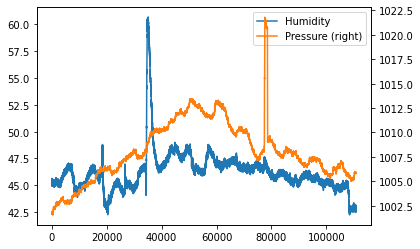

In [38]:
import matplotlib.pyplot as plt

df['humidity'].plot(label="Humidity", legend=True)
# by using the secondary_true=True option, it is possible to plot the y scale
# of the second series of data on the y axis on the right
df.pressure.plot(secondary_y=True, label="Pressure", legend=True)

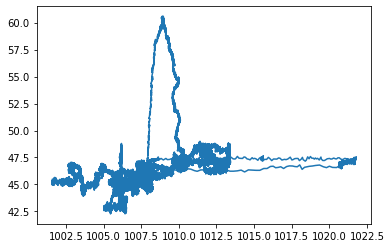

In [52]:
plt.plot(df['pressure'], df['humidity'])

#### Operations on rows

Accessing data by rows is possible using the method `iloc[i]`.

In [53]:
df.iloc[4]

ROW_ID                          5
temp_cpu                    31.66
temp_h                      27.54
temp_p                      25.01
humidity                    45.18
pressure                  1001.71
pitch                        0.85
roll                        53.66
yaw                        186.46
mag_x                  -50.056683
mag_y                   -8.122609
mag_z                  -12.678341
accel_x                 -0.000548
accel_y                  0.019378
accel_z                   0.01438
gyro_x                   0.000321
gyro_y                   0.000691
gyro_z                   0.000272
reset                           0
time_stamp    2016-02-16 10:45:20
Name: 4, dtype: object

In [54]:
# to select the rows from 5 to 7 (excluded)
df.iloc[5:7]

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,time_stamp
5,6,31.69,27.55,25.01,45.12,1001.67,0.85,53.53,185.52,-50.246476,-8.343209,-11.938124,-0.000536,0.019453,0.014380,0.000273,0.000494,-0.000059,0,2016-02-16 10:45:30
6,7,31.68,27.53,25.01,45.31,1001.70,0.63,53.55,186.10,-50.447346,-7.937309,-12.188574,-0.000510,0.019264,0.014528,-0.000111,0.000320,0.000222,0,2016-02-16 10:45:41


In [55]:
# to work with specific subsets of the dataset, it is possible to assign the subset to a variable
df2 = df.iloc[12500:15000]

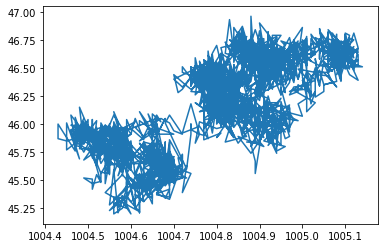

In [56]:
plt.plot(df2['pressure'], df2['humidity'])



<AxesSubplot:>

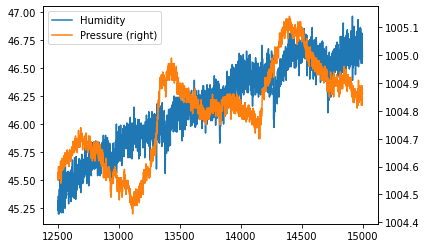

In [57]:
df2.humidity.plot(label="Humidity", legend=True)
df2.pressure.plot(secondary_y=True, label="Pressure", legend=True)

Data can be filtered using a specific condition, such as

In [58]:
df.ROW_ID >= 6

0         False
1         False
2         False
3         False
4         False
          ...  
110864     True
110865     True
110866     True
110867     True
110868     True
Name: ROW_ID, Length: 110869, dtype: bool

The result is an `Series` object that can be used to filter a dataset. The condition must be put between `[``]` after the variable where the dataset is saved.

In [59]:
df[df.ROW_ID <= 6]

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,time_stamp
0,1,31.88,27.57,25.01,44.94,1001.68,1.49,52.25,185.21,-46.422753,-8.132907,-12.129346,-0.000468,0.019439,0.014569,0.000942,0.000492,-0.000750,20,2016-02-16 10:44:40
1,2,31.79,27.53,25.01,45.12,1001.72,1.03,53.73,186.72,-48.778951,-8.304243,-12.943096,-0.000614,0.019436,0.014577,0.000218,-0.000005,-0.000235,0,2016-02-16 10:44:50
2,3,31.66,27.53,25.01,45.12,1001.72,1.24,53.57,186.21,-49.161878,-8.470832,-12.642772,-0.000569,0.019359,0.014357,0.000395,0.000600,-0.000003,0,2016-02-16 10:45:00
3,4,31.69,27.52,25.01,45.32,1001.69,1.57,53.63,186.03,-49.341941,-8.457380,-12.615509,-0.000575,0.019383,0.014409,0.000308,0.000577,-0.000102,0,2016-02-16 10:45:10
4,5,31.66,27.54,25.01,45.18,1001.71,0.85,53.66,186.46,-50.056683,-8.122609,-12.678341,-0.000548,0.019378,0.014380,0.000321,0.000691,0.000272,0,2016-02-16 10:45:20
5,6,31.69,27.55,25.01,45.12,1001.67,0.85,53.53,185.52,-50.246476,-8.343209,-11.938124,-0.000536,0.019453,0.014380,0.000273,0.000494,-0.000059,0,2016-02-16 10:45:30


Multiple conditions can be met using the operators `&` and `|`. **REMEMBER** to include the condition between ().

In [60]:
(df.ROW_ID >= 6) & (df.ROW_ID <= 10)

0         False
1         False
2         False
3         False
4         False
          ...  
110864    False
110865    False
110866    False
110867    False
110868    False
Name: ROW_ID, Length: 110869, dtype: bool

In [61]:
df[  (df.ROW_ID >= 6) & (df.ROW_ID <= 10)  ] # the df inside [] is used to indicate the condition, whereas the df used outside [] is used to contain the filtering conditions


,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,time_stamp
5,6,31.69,27.55,25.01,45.12,1001.67,0.85,53.53,185.52,-50.246476,-8.343209,-11.938124,-0.000536,0.019453,0.014380,0.000273,0.000494,-0.000059,0,2016-02-16 10:45:30
6,7,31.68,27.53,25.01,45.31,1001.70,0.63,53.55,186.10,-50.447346,-7.937309,-12.188574,-0.000510,0.019264,0.014528,-0.000111,0.000320,0.000222,0,2016-02-16 10:45:41
7,8,31.66,27.55,25.01,45.34,1001.70,1.49,53.65,186.08,-50.668232,-7.762600,-12.284196,-0.000523,0.019473,0.014298,-0.000044,0.000436,0.000301,0,2016-02-16 10:45:50
8,9,31.67,27.54,25.01,45.20,1001.72,1.22,53.77,186.55,-50.761529,-7.262934,-11.981090,-0.000522,0.019385,0.014286,0.000358,0.000651,0.000187,0,2016-02-16 10:46:01
9,10,31.67,27.54,25.01,45.41,1001.75,1.63,53.46,185.94,-51.243832,-6.875270,-11.672494,-0.000581,0.019390,0.014441,0.000266,0.000676,0.000356,0,2016-02-16 10:46:10


In [62]:
# to see the row with the maximum pressure
df[  (df.pressure == df.pressure.values.max())  ]

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,time_stamp
77602,77603,32.44,28.31,25.74,47.57,1021.78,1.1,51.82,267.39,-0.797428,10.891803,-15.728202,-0.000612,0.01817,0.014295,-0.000139,-0.000179,-0.000298,0,2016-02-25 12:13:20


#### Sorting

The method `sort_values` returns a DataFrame ordered according to the values contained in a specific column.

In [63]:
df.sort_values('pressure',ascending=False).head()

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,time_stamp
77602,77603,32.44,28.31,25.74,47.57,1021.78,1.10,51.82,267.39,-0.797428,10.891803,-15.728202,-0.000612,0.018170,0.014295,-0.000139,-0.000179,-0.000298,0,2016-02-25 12:13:20
77601,77602,32.45,28.30,25.74,47.26,1021.75,1.53,51.76,266.12,-1.266335,10.927442,-15.690558,-0.000661,0.018357,0.014533,0.000152,0.000459,-0.000298,0,2016-02-25 12:13:10
77603,77604,32.44,28.30,25.74,47.29,1021.75,1.86,51.83,268.83,-0.320795,10.651441,-15.565123,-0.000648,0.018290,0.014372,0.000049,0.000473,-0.000029,0,2016-02-25 12:13:30
77604,77605,32.43,28.30,25.74,47.39,1021.75,1.78,51.54,269.41,-0.130574,10.628383,-15.488983,-0.000672,0.018154,0.014602,0.000360,0.000089,-0.000002,0,2016-02-25 12:13:40
77608,77609,32.42,28.29,25.74,47.36,1021.73,0.86,51.89,272.77,0.952025,10.435951,-16.027235,-0.000607,0.018186,0.014232,-0.000260,-0.000059,-0.000187,0,2016-02-25 12:14:20


#### Object values and strings

When we want to manipulate objects of an unknown type, say for instance strings with type `str`, it is possible to write `.str` after a Series object and treat the series as it was a string.
The methods available for strings can then be used.

For instance, `str.contains` can be used to select all the observations gathered at a specific date.

In [64]:
df[  df['time_stamp'].str.contains('2016-02-2')  ]

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,time_stamp
30442,30443,32.30,28.12,25.59,45.05,1008.01,1.47,51.82,51.18,9.215883,-12.947023,4.066202,-0.000612,0.018792,0.014558,-0.000042,0.000275,0.000157,0,2016-02-20 00:00:00
30443,30444,32.25,28.13,25.59,44.82,1008.02,0.81,51.53,52.21,8.710130,-13.143595,3.499386,-0.000718,0.019290,0.014667,0.000260,0.001011,0.000149,0,2016-02-20 00:00:10
30444,30445,33.07,28.13,25.59,45.08,1008.09,0.68,51.69,57.36,7.383435,-13.827667,4.438656,-0.000700,0.018714,0.014598,0.000299,0.000343,-0.000025,0,2016-02-20 00:00:41
30445,30446,32.63,28.10,25.60,44.87,1008.07,1.42,52.13,59.95,7.292313,-13.999682,4.517029,-0.000657,0.018857,0.014565,0.000160,0.000349,-0.000190,0,2016-02-20 00:00:50
30446,30447,32.55,28.11,25.60,44.94,1008.07,1.41,51.86,61.83,6.699141,-14.065591,4.448778,-0.000678,0.018871,0.014564,-0.000608,-0.000381,-0.000243,0,2016-02-20 00:01:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110864,110865,31.56,27.52,24.83,42.94,1005.83,1.58,49.93,129.60,-15.169673,-27.642610,1.563183,-0.000682,0.017743,0.014646,-0.000264,0.000206,0.000196,0,2016-02-29 09:24:21
110865,110866,31.55,27.50,24.83,42.72,1005.85,1.89,49.92,130.51,-15.832622,-27.729389,1.785682,-0.000736,0.017570,0.014855,0.000143,0.000199,-0.000024,0,2016-02-29 09:24:30
110866,110867,31.58,27.50,24.83,42.83,1005.85,2.09,50.00,132.04,-16.646212,-27.719479,1.629533,-0.000647,0.017657,0.014799,0.000537,0.000257,0.000057,0,2016-02-29 09:24:41
110867,110868,31.62,27.50,24.83,42.81,1005.88,2.88,49.69,133.00,-17.270447,-27.793136,1.703806,-0.000835,0.017635,0.014877,0.000534,0.000456,0.000195,0,2016-02-29 09:24:50


To extract only the day from the column `time_stamp`, we can use `str` with the operator slice and `[` `]`.

In [65]:
df['time_stamp'].str[8:10]

0         16
1         16
2         16
3         16
4         16
          ..
110864    29
110865    29
110866    29
110867    29
110868    29
Name: time_stamp, Length: 110869, dtype: object

#### Operations on columns

To select a subset of columns, we can use the `[` `]` and provide a list with the column names that we want to select.

In [66]:
df[['temp_h', 'temp_p', 'time_stamp']]

,temp_h,temp_p,time_stamp
0,27.57,25.01,2016-02-16 10:44:40
1,27.53,25.01,2016-02-16 10:44:50
2,27.53,25.01,2016-02-16 10:45:00
3,27.52,25.01,2016-02-16 10:45:10
4,27.54,25.01,2016-02-16 10:45:20
...,...,...,...
110864,27.52,24.83,2016-02-29 09:24:21
110865,27.50,24.83,2016-02-29 09:24:30
110866,27.50,24.83,2016-02-29 09:24:41
110867,27.50,24.83,2016-02-29 09:24:50


#### Add new columns to the DataFrame

New columns can be obtained by performing simple mathematical operations on the values of already existing columns.
For instance, we may want to calculate the absolute value of the magnetic field observed from the orbital space station.
We can save the values obtained so far in a new column (which will be added to the DataFrame) and then plot the new values.

<AxesSubplot:>

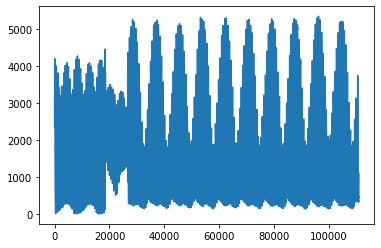

In [67]:
df['mag_tot'] = df['mag_x']**2 + df['mag_y']**2 + df['mag_z']**2
df.mag_tot.plot()

Then, we may want to find when the value reached its maximum.

In [68]:
df['time_stamp'][(df.mag_tot == df.mag_tot.values.max())]

96156    2016-02-27 16:12:31
Name: time_stamp, dtype: object

#### Writing on specific rows

The property `loc` allow us to filter rows according to a property and to select a column, which can also be new.
In this case, we want to write the value `True` in the column `too_hot` when the temperature exceed a given threshold.

In [69]:
df.loc[(df.temp_cpu > 31.68),'Too hot'] = True

In the DataFrame we will see a new column with `True` where the condition is satisfied and `NaN` otherwise.

In [70]:
df.head()

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,...,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,time_stamp,mag_tot,Too hot
0,1,31.88,27.57,25.01,44.94,1001.68,1.49,52.25,185.21,-46.422753,...,-0.000468,0.019439,0.014569,0.000942,0.000492,-0.000750,20,2016-02-16 10:44:40,2368.337207,True
1,2,31.79,27.53,25.01,45.12,1001.72,1.03,53.73,186.72,-48.778951,...,-0.000614,0.019436,0.014577,0.000218,-0.000005,-0.000235,0,2016-02-16 10:44:50,2615.870247,True
2,3,31.66,27.53,25.01,45.12,1001.72,1.24,53.57,186.21,-49.161878,...,-0.000569,0.019359,0.014357,0.000395,0.000600,-0.000003,0,2016-02-16 10:45:00,2648.484927,NaN
3,4,31.69,27.52,25.01,45.32,1001.69,1.57,53.63,186.03,-49.341941,...,-0.000575,0.019383,0.014409,0.000308,0.000577,-0.000102,0,2016-02-16 10:45:10,2665.305485,True
4,5,31.66,27.54,25.01,45.18,1001.71,0.85,53.66,186.46,-50.056683,...,-0.000548,0.019378,0.014380,0.000321,0.000691,0.000272,0,2016-02-16 10:45:20,2732.388620,NaN


The same result can be achieved using the method `where`.
For instance, we may want to know if certain values are `above` or `below` a given threshold.

In [71]:
pressione_media = df.pressure.values.mean()
df['check_p'] = np.where(df.pressure <= pressione_media, 'below', 'above')
df.head()

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,...,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,time_stamp,mag_tot,Too hot,check_p
0,1,31.88,27.57,25.01,44.94,1001.68,1.49,52.25,185.21,-46.422753,...,0.019439,0.014569,0.000942,0.000492,-0.000750,20,2016-02-16 10:44:40,2368.337207,True,below
1,2,31.79,27.53,25.01,45.12,1001.72,1.03,53.73,186.72,-48.778951,...,0.019436,0.014577,0.000218,-0.000005,-0.000235,0,2016-02-16 10:44:50,2615.870247,True,below
2,3,31.66,27.53,25.01,45.12,1001.72,1.24,53.57,186.21,-49.161878,...,0.019359,0.014357,0.000395,0.000600,-0.000003,0,2016-02-16 10:45:00,2648.484927,NaN,below
3,4,31.69,27.52,25.01,45.32,1001.69,1.57,53.63,186.03,-49.341941,...,0.019383,0.014409,0.000308,0.000577,-0.000102,0,2016-02-16 10:45:10,2665.305485,True,below
4,5,31.66,27.54,25.01,45.18,1001.71,0.85,53.66,186.46,-50.056683,...,0.019378,0.014380,0.000321,0.000691,0.000272,0,2016-02-16 10:45:20,2732.388620,NaN,below


#### Exercise: convert temperatures

Convert temperatures in Celsius to temperature in Fahrenheit; the equation is the following:

$Fahrenheit = \frac{9}{5} C + 32$

#### Exercise: try to verify the Gay-Lussac law

According to the Gay-Lussac law, the temperature should be proportional to humidity in a close system.

$ \frac{P}{T} = k $

Try to verify if this is true for the dataset `df`. You can calculate the value directly, and then compare it with the results of the method `corr()`.

In [72]:
df.corr()

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,mag_tot
ROW_ID,1.000000,0.361391,0.435289,0.339916,-0.110241,0.243337,-0.007741,-0.390159,-0.034877,-0.035966,-0.025818,0.108138,-0.132291,-0.918587,-0.080899,-0.001906,-0.004913,-0.000211,-0.005202,-0.049427
temp_cpu,0.361391,1.000000,0.986872,0.991672,-0.297081,0.038065,0.008076,-0.171644,-0.117972,0.005145,-0.285192,-0.120838,-0.023582,-0.446358,-0.029155,0.002511,0.005947,-0.001250,-0.002970,0.108550
temp_h,0.435289,0.986872,1.000000,0.993260,-0.281422,0.070882,0.005145,-0.199628,-0.117870,0.000428,-0.276276,-0.098864,-0.032188,-0.510126,-0.043213,0.001771,0.005020,-0.001423,-0.004325,0.103654
temp_p,0.339916,0.991672,0.993260,1.000000,-0.288373,0.035496,0.006750,-0.163685,-0.118463,0.004338,-0.283427,-0.114407,-0.018047,-0.428884,-0.036505,0.001829,0.006127,-0.001623,-0.004205,0.113361
humidity,-0.110241,-0.297081,-0.281422,-0.288373,1.000000,0.434374,0.004050,0.101304,0.031664,-0.035146,0.077897,0.076424,-0.009741,0.226281,0.005281,0.004345,0.003457,0.001298,-0.002066,-0.027852
pressure,0.243337,0.038065,0.070882,0.035496,0.434374,1.000000,0.003018,0.011815,-0.051697,-0.040183,-0.074578,0.092352,0.013556,-0.115642,-0.221208,-0.000611,-0.002493,-0.000615,-0.006259,0.013998
pitch,-0.007741,0.008076,0.005145,0.006750,0.004050,0.003018,1.000000,0.087941,-0.011611,0.013331,0.006133,0.000540,0.043285,0.009015,-0.039146,0.066618,-0.015034,0.049340,-0.000176,-0.005345
roll,-0.390159,-0.171644,-0.199628,-0.163685,0.101304,0.011815,0.087941,1.000000,0.095354,-0.020947,0.060297,-0.080620,0.116637,0.462630,-0.167905,-0.115873,-0.002509,-0.214202,0.000636,0.047307
yaw,-0.034877,-0.117972,-0.117870,-0.118463,0.031664,-0.051697,-0.011611,0.095354,1.000000,0.257971,0.549394,-0.328360,0.006943,0.044157,-0.013634,0.003106,0.003665,0.004020,-0.000558,-0.176929
mag_x,-0.035966,0.005145,0.000428,0.004338,-0.035146,-0.040183,0.013331,-0.020947,0.257971,1.000000,0.001239,-0.213070,-0.006629,0.027921,0.021524,-0.004954,-0.004429,-0.005052,-0.002879,-0.822156


In [73]:
df['pressure'] / df['temp_p']

0         40.051180
1         40.052779
2         40.052779
3         40.051579
4         40.052379
            ...    
110864    40.508659
110865    40.509464
110866    40.509464
110867    40.510673
110868    40.509867
Length: 110869, dtype: float64

#### Transform columns

Let's say that for some reason we want to transform the column `temperature` to integer values, we can do it using the method `transform` and pass the function `int` as a parameter.

In [74]:
df['humidity_int'] = df['humidity'].transform(int)
df['humidity'].transform(int)

0         44
1         45
2         45
3         45
4         45
          ..
110864    42
110865    42
110866    42
110867    42
110868    42
Name: humidity, Length: 110869, dtype: int64

Notice that `int` was passed without parenthesis `(``)`, in this case `int` is an object of type function.

#### Grouping

To group objects and obtain statistics on each group, the method `groupby` can be used.
Assume that we want to count how many records of `humidity` have been recorded for each integer value of humidity.

After the method `group_by`, the column on which to group is provided as the first parameter, then the column over which to perform the statistics is provided, i.e., `humidity`, and finally the desired statistics is provided as a method.
In this case, we chose `.count()`, but we may have chosen `.mean()`, `.min()`, `max()`.

In [75]:
df.groupby(['humidity_int'])['humidity'].count()

humidity_int
42     2776
43     2479
44    13029
45    32730
46    35775
47    14176
48     7392
49      297
50      155
51      205
52      209
53      128
54      224
55      164
56      139
57      183
58      237
59      271
60      300
Name: humidity, dtype: int64

array([[<AxesSubplot:title={'center':'humidity_int'}>]], dtype=object)

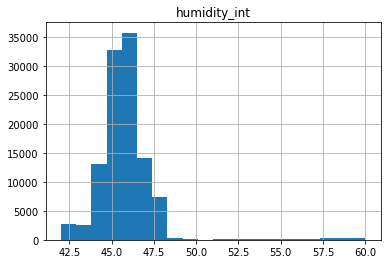

In [77]:
df.hist(column='humidity_int', bins=20)